In [37]:
import numpy as np
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt
import pytesseract
from pprint import pprint

In [38]:
def show_img(img):
    fig = plt.gcf()
    fig.set_size_inches(16, 8)
    plt.axis(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

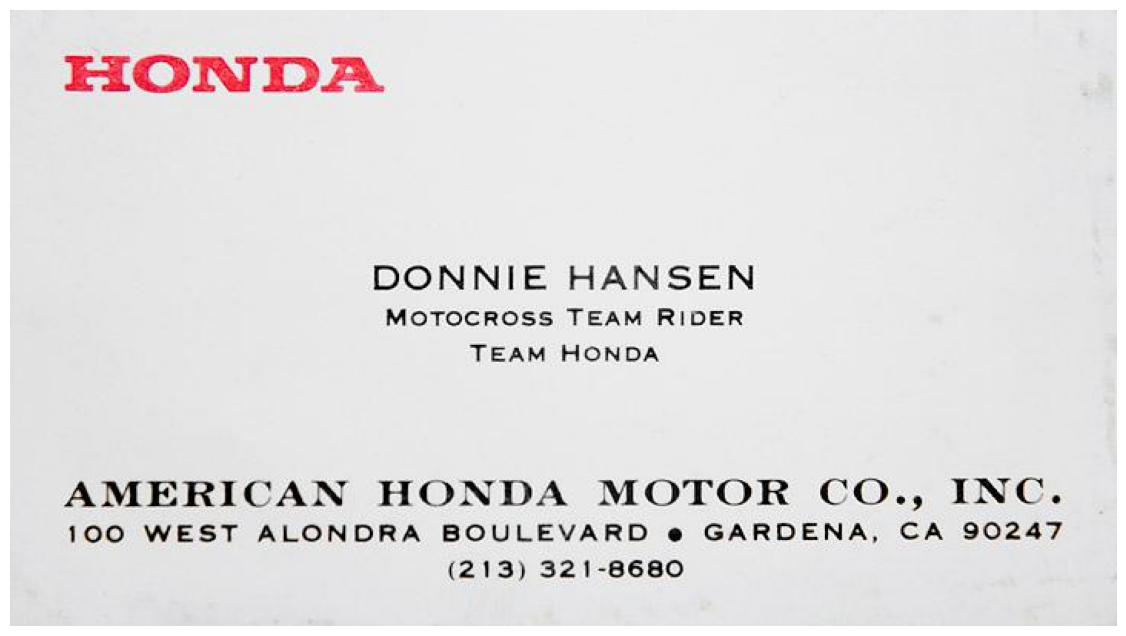

In [39]:
img_cv = cv2.imread('Selected/052.jpeg')
show_img(img_cv)

### Text from Image

In [40]:
text = pytesseract.image_to_string(img_cv)
print(text)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680


In [41]:
data = pytesseract.image_to_data(img_cv)
data.split('\n')
dataList = list(map(lambda x: x.split('\t'), data.split('\n')))
df = pd.DataFrame(dataList[1:], columns=dataList[0])
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92.618942,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96.634560,DONNIE
9,5,1,2,1,1,2,364,166,119,16,95.774574,HANSEN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      38 non-null     object
 1   page_num   37 non-null     object
 2   block_num  37 non-null     object
 3   par_num    37 non-null     object
 4   line_num   37 non-null     object
 5   word_num   37 non-null     object
 6   left       37 non-null     object
 7   top        37 non-null     object
 8   width      37 non-null     object
 9   height     37 non-null     object
 10  conf       37 non-null     object
 11  text       37 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


In [43]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level', 'page_num', 'block_num', 'par_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']
df[col_int] = df[col_int].astype(float).astype(int)

In [44]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num     object
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

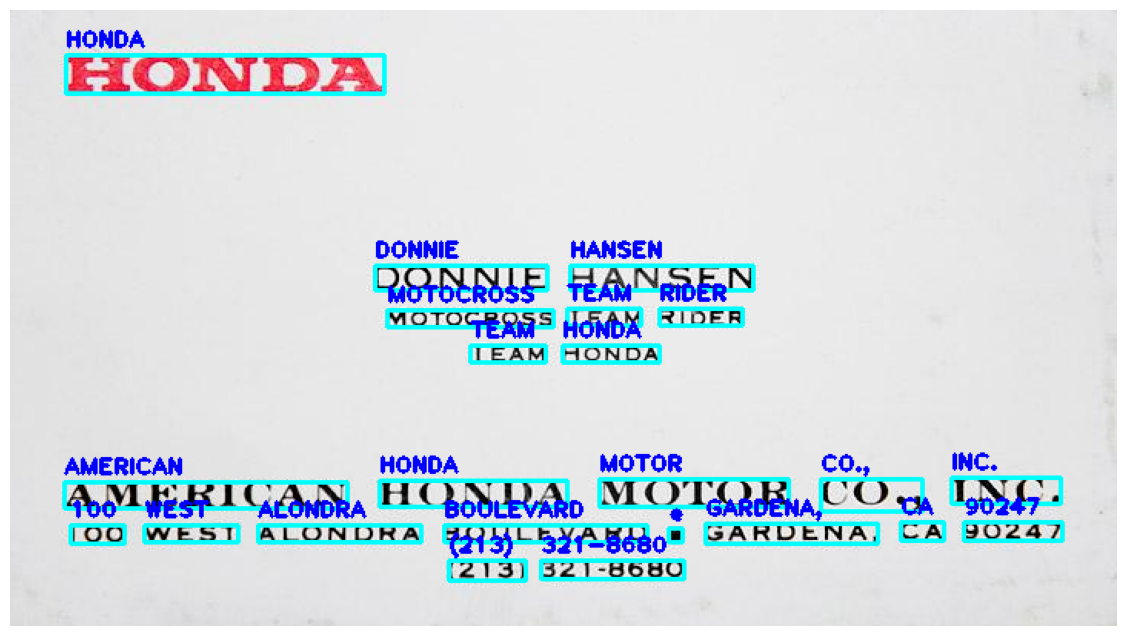

In [45]:
image = img_cv.copy()
level = 'word'
for l, x, y, w, h, c, text in df[['level', 'left', 'top', 'width', 'height', 'conf', 'text']].values:
    # print(l, x, y, w, h, c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)
        else:
            continue
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        else:
            continue
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        else:
            continue
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        else:
            continue
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
            cv2.putText(image, text, (x, y-5), cv2.FONT_HERSHEY_PLAIN,1, (255, 0, 0), 2)
        else:
            continue
            
show_img(image)